In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN,Dense, Activation
from sklearn.metrics import confusion_matrix

In [2]:
(X_train,Y_train), (X_test, Y_test) = imdb.load_data(path = "imdb.npz",
                                    num_words = None,
                                    skip_top = 0,
                                    maxlen = None,
                                    seed = 113,
                                    start_char = 1,
                                    oov_char = 2,
                                    index_from = 3)

In [3]:
print("Type: ",type(X_train))

Type:  <class 'numpy.ndarray'>


In [4]:
print("X train shape: ",X_train.shape)
print("Y train shape: ",Y_train.shape)

X train shape:  (25000,)
Y train shape:  (25000,)


# Exploratory Data Analysis

In [5]:
print("Y train values: ",np.unique(Y_train))
print("Y test values: ",np.unique(Y_test))

Y train values:  [0 1]
Y test values:  [0 1]


In [6]:
unique,  counts = np.unique(Y_train, return_counts = True)
print("Y train distribution: ", dict(zip(unique,counts)))

Y train distribution:  {0: 12500, 1: 12500}


In [7]:
unique,  counts = np.unique(Y_test, return_counts = True)
print("Y test distribution: ", dict(zip(unique,counts)))

Y test distribution:  {0: 12500, 1: 12500}


C:\Users\amitr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


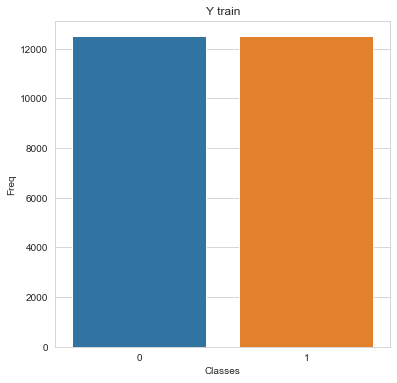

In [8]:
plt.figure(figsize = (6,6))
sns.countplot(Y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y train")
plt.show()

C:\Users\amitr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


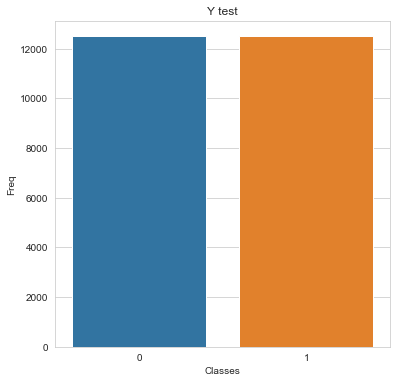

In [9]:
plt.figure(figsize = (6,6))
sns.countplot(Y_test)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y test")
plt.show()

In [10]:
d = X_train[0]
print(d)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [11]:
print(len(d))

218


C:\Users\amitr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amitr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


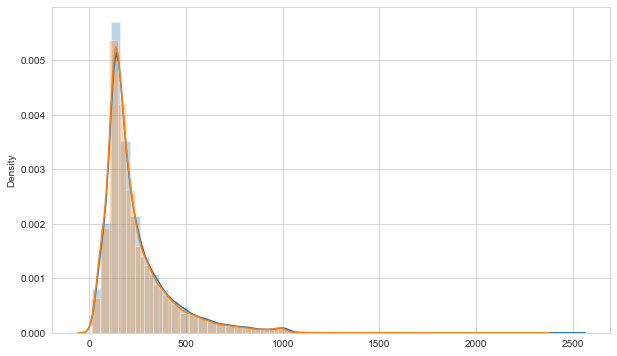

In [12]:
review_len_train = []
review_len_test = []
for i,ii in zip(X_train, X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(ii))

plt.figure(figsize = (10,6))
sns.distplot(review_len_train, hist_kws = {"alpha":0.3})
sns.distplot(review_len_test, hist_kws = {"alpha":0.3})
plt.show()

In [13]:
print("Train Mean:", np.mean(review_len_train))
print("Train Median:", np.median(review_len_train))
print("Train Mode:", stats.mode(review_len_train)[0][0])

Train Mean: 238.71364
Train Median: 178.0
Train Mode: 132


# Number of Words

In [14]:
word_index = imdb.get_word_index()
print(type(word_index))

<class 'dict'>


In [15]:
print(len(word_index))

88584


In [16]:
for keys, values in word_index.items():
    if values == 1:
        print(keys)

the


In [17]:
def whatItSay(index = 24):
    
    reverse_index = dict([(value,key) for (key, value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i - 3, "!") for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review

In [18]:
decoded_review = whatItSay(15)

! a total waste of time just throw in a few explosions non stop fighting exotic cars a deranged millionaire slow motion computer generated car crashes and last but not least a hugh hefner like character with wall to wall hot babes and mix in a blender and you will have this sorry excuse for a movie i really got a laugh out of the dr evil like heavily fortified compound the plot was somewhere between preposterous and non existent how many millionaires are willing to make a 25 million dollar bet on a car race answer 4 but didn't they become millionaires through fiscal responsibility this was written for pubescent males it plays like a video game i did enjoy the gulfstream ii landing in the desert though
0


# Preprocessing

In [19]:
num_words = 25000
(X_train,Y_train), (X_test, Y_test) = imdb.load_data(num_words = num_words)

In [20]:
maxlen = 160
X_train = pad_sequences(X_train, maxlen = maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)

print(X_train[5])

for i in X_train[0:10]:
    print(len(i))
    
decoded_review = whatItSay(5)

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     1   778   128
    74    12   630   163    15     4  1766  7982  1051     2    32    85
   156    45    40   148   139   121   664   665    10    10  1361   173
     4   749     2    16  3804     8     4   226    65    12    43   127
    24 15344    10    10]
160
160
160
160
160
160
1

# Constructing Recurrent Neural Network

In [21]:
rnn = Sequential()
rnn.add(Embedding(num_words, 32, input_length = len(X_train[0])))
rnn.add(SimpleRNN(16, input_shape = (num_words, maxlen), return_sequences = False, activation = "relu"))
rnn.add(Dense(1,activation = "sigmoid"))
# rnn.add(Activation("sigmoid"))

print(rnn.summary())
rnn.compile(loss = "binary_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 160, 32)           800000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 800,801
Trainable params: 800,801
Non-trainable params: 0
_________________________________________________________________
None


# Training Recurrent Neural Network

In [22]:
history = rnn.fit(X_train, Y_train, validation_data = (X_test, Y_test),epochs = 30, batch_size = 128, verbose = 1)

Epoch 1/30
196/196 [==============================] - 5s 20ms/step - loss: 0.6388 - accuracy: 0.6185 - val_loss: 0.4889 - val_accuracy: 0.7900
Epoch 2/30
196/196 [==============================] - 4s 20ms/step - loss: 0.3573 - accuracy: 0.8533 - val_loss: 0.4328 - val_accuracy: 0.8044
Epoch 3/30
196/196 [==============================] - 4s 20ms/step - loss: 0.2080 - accuracy: 0.9188 - val_loss: 0.3422 - val_accuracy: 0.8605
Epoch 4/30
196/196 [==============================] - 4s 20ms/step - loss: 0.1406 - accuracy: 0.9493 - val_loss: 0.3597 - val_accuracy: 0.8594
Epoch 5/30
196/196 [==============================] - 4s 20ms/step - loss: 0.0831 - accuracy: 0.9728 - val_loss: 0.4103 - val_accuracy: 0.8516
Epoch 6/30
196/196 [==============================] - 4s 20ms/step - loss: 0.0549 - accuracy: 0.9833 - val_loss: 0.4931 - val_accuracy: 0.8468
Epoch 7/30
196/196 [==============================] - 4s 20ms/step - loss: 0.0415 - accuracy: 0.9875 - val_loss: 0.5278 - val_accuracy: 0.8467

# Evaluating Result

# Accuracy

In [23]:
score = rnn.evaluate(X_test, Y_test)
print("Accuracy: %",score[1]*100)

782/782 [==============================] - 2s 3ms/step - loss: 1.2589 - accuracy: 0.8380
Accuracy: % 83.80399942398071


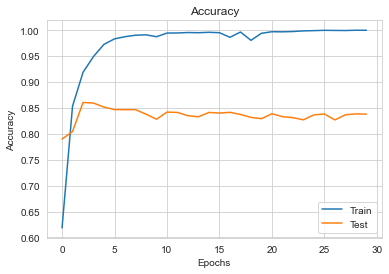

In [24]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

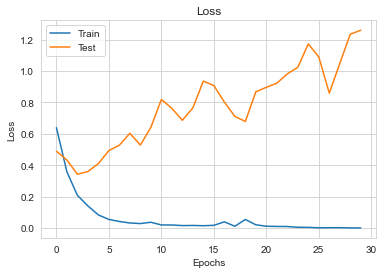

In [25]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

# Confusion Matrix

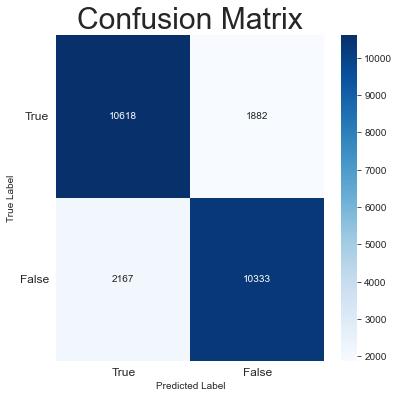

True Positive: 10618
True Negative: 10333
False Positive: 1882
False Negative: 2167


In [26]:
y_pred = rnn.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(Y_test,y_pred)

df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 30)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))